<br><br><br><br><br><br>

## CNN으로 신경망 구현<br><br><br><br>

    기존층의 문제점
    합성곱 계층의 개념과 파이썬으로 구현
        1. im2col 함수 이용 (이미지 → 행렬)
        2. reshape 의 -1 이용 (4차원 행렬(가중치) → 2차원)
    풀링 계층의 개념과 파이썬으로 구현

<hr>
### 합성곱 신경망 이란?
    Convolution 층과 pooling 층을 포함하는 신경망

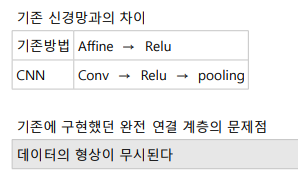

In [1]:
Image.open("C:\\Users\\QIA\\Desktop\\캡처1.png")

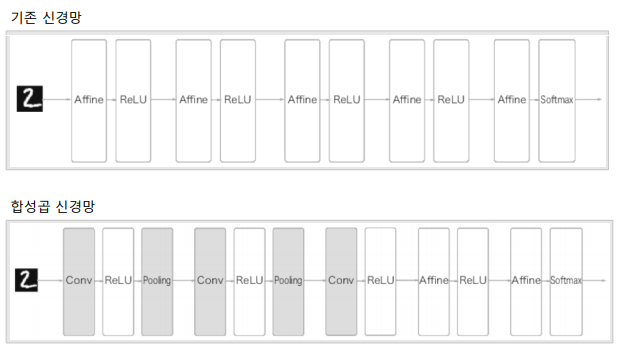

In [2]:
Image.open("C:\\Users\\QIA\\Desktop\\캡처.png")

## 합성곱 계층 (Convolution Layer)

합성곱 계층의 역할 : 

" feature map 을 만들고 그 feature map 을 선명하게 해주는 층 "

### CNN을 이용하지 않은 기존층의 문제점

    필기체 데이터를 28 x 28 = 784 의 1차원 데이터로 변경을 해서 784개의 데이터를 첫 Affine 계층에 입력한게 기존 방법이다
    따라서, 형상을 무시하고 모든 입력 데이터를 동등한 뉴런으로 취급하기 때문에 이미지가 갖는 본질적인 패턴을 읽지 못한다.
    

    결국 원본 이미지에서 조금만 모양이 달라져도 같은 이미지로 인식하지 못하는 문제를 합성곱이 해결해 줄 수 있다
    　
     　
##### 어떻게 해결 하는지 ?

    원본이미지를 가지고 여러 개의 feature map 을 만들어서 분류하는 완전 연결 계층에 입력한다

### 합성곱 연산

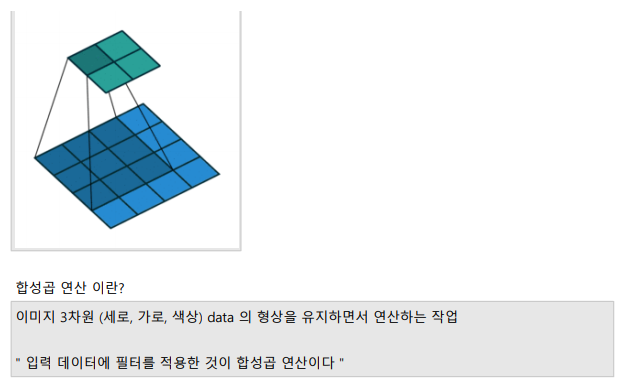

In [3]:
Image.open("C:\\Users\\QIA\\Desktop\\캡처.png")

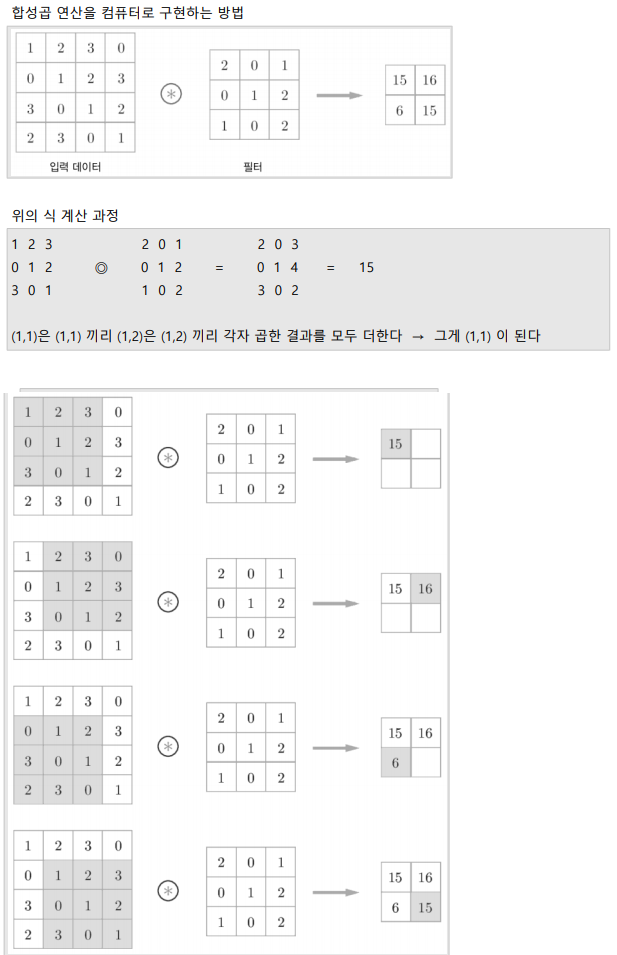

In [4]:
Image.open("C:\\Users\\QIA\\Desktop\\캡쳐1.png")

문제 173) 아래의 두 행렬을 만들고 합성곱한 결과인 15를 파이썬으로 출력하시오

    1 2 3 　　 2 0 1 　　 2 0 3
    0 1 2  ◎  0 1 2   =  0 1 4  =  15
    3 0 1 　　 1 0 2 　　 3 0 2

In [5]:
import numpy as np
A = np.array([[1,2,3],
 [0,1,2],
 [3,0,1]])
B = np.array([[2,0,1],
 [0,1,2],
 [1,0,2]])
AB = A * B
np.sum(AB)

15

문제 177) 아래의 합성곱을 파이썬으로 구현하시오


    1 2 3 0
    0 1 2 3 　　 2 0 1
    3 0 1 2  ◎  0 1 2 = [15, 16, 6, 15]
    2 3 0 1 　　 1 0 2 

In [7]:
import numpy as np
A = np.array([[1,2,3,0],
 [0,1,2,3],
 [3,0,1,2],
 [2,3,0,1]])
filter = np.array([[2,0,1],
 [0,1,2],
 [1,0,2]])
row_size = len(A[0])
col_size = len(A)
result = []
for i in range(row_size-2):
    for j in range(col_size-2):
        result.append(np.sum(A[i:i+3, j:j+3]*filter))
print(np.reshape(result, (2,2)))

[[15 16]
 [ 6 15]]


문제 179) 아래의 그림의 convolution 연산을 파이썬으로 구현하시오

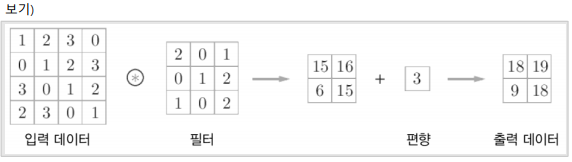

In [8]:
Image.open("C:\\Users\\QIA\\Desktop\\캡처.png")

In [9]:
import numpy as np
A = np.array([[1,2,3,0],
 [0,1,2,3],
 [3,0,1,2],
 [2,3,0,1]])
filter = np.array([[2,0,1],
 [0,1,2],
 [1,0,2]])
row_size = len(A[0])
col_size = len(A)
result = []
for i in range(row_size-2):
    for j in range(col_size-2):
        result.append(np.sum(A[i:i+3, j:j+3]*filter))

res = np.reshape(result, (2,2))
bias = 3
print(res + bias)

[[18 19]
 [ 9 18]]


### 패딩 (Padding)

" 합성곱 연산을 수행하기 전에 입력 데이터 주변을 특정값으로 채워 늘리는 것을 말한다 "

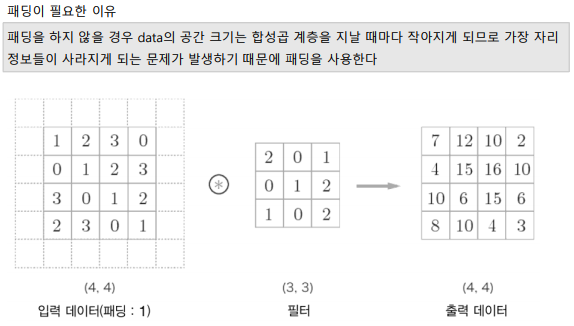

In [10]:
Image.open("C:\\Users\\QIA\\Desktop\\캡처.png")

문제 181) 4 x 4 행렬에 3 x 3 필터를 적용해서 결과로 4 x 4 행렬이 출력되게 하려면 제로 패딩을 몇을 해줘야 하는가?

In [11]:
import numpy as np
r = np.array([[15,16], [6,15]])
r_pad = np.pad(r, pad_width=2, mode='constant', constant_values=0)
print(r_pad)

[[ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0 15 16  0  0]
 [ 0  0  6 15  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]]


### 스트라이드 (Stride)

" 필터를 적용하는 위치의 간격 "


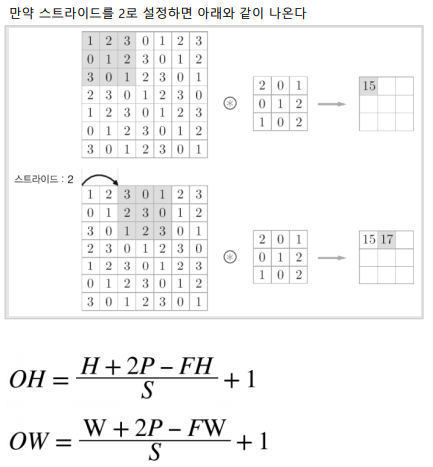

In [13]:
Image.open("C:\\Users\\QIA\\Desktop\\캡처.png")

문제 183) 입력 이미지 4 x 4 행렬에 필터 3 x 3 행렬을 합성곱한 결과 행렬이 4 x 4 행렬이 되려면 패딩이 몇인지 출력하시오


In [15]:
P = ((4 - 1) * 1 - 4 + 3) / 2
P

1.0

문제 184) 위의 패딩 공식을 구현하는 파이썬 함수를 생성하시오

In [16]:
def padding(H, S, OH, FH):
    P = ((OH-1)*S - (H-FH)) / 2
    return P
print(padding(4, 1, 4, 3))

1.0


### 3차원 데이터의 합성곱 연산


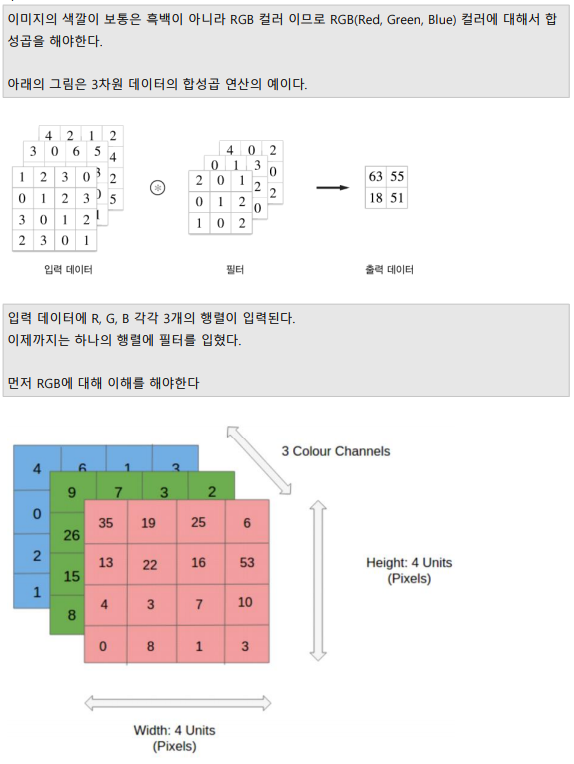

In [17]:
Image.open("C:\\Users\\QIA\\Desktop\\캡처.png")

문제 186) 레나 사진을 3차원 행렬로 변환하시오

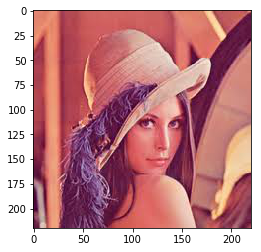

In [20]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
##5.1. 원본 이미지 불러오기
img = Image.open("C:\\Users\\QIA\\Desktop\\다운로드.jpg")
img_pixel = np.array(img)
plt.imshow(img_pixel)

문제 187) 한지민 사진에서 Red 행렬만 출력하고 Red 행렬만 시각화 하시오

[[230 230 229 ... 220 232 209]
 [229 229 229 ... 227 234 216]
 [229 229 228 ... 194 177 154]
 ...
 [ 84  92  98 ... 127 141 149]
 [ 81  87  95 ... 140 154 163]
 [ 77  86  92 ... 150 163 170]]


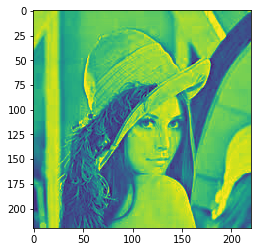

In [21]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
##5.1. 원본 이미지 불러오기
img = Image.open("C:\\Users\\QIA\\Desktop\\다운로드.jpg")
img_pixel = np.array(img)
plt.imshow(img_pixel[:,:,0])
print(img_pixel[:,:,0])

문제 197) 아래의 원본 이미지인 data 행렬과 filter 행렬을 3차원 합성곱 하기 위한 그림을 이해하시오


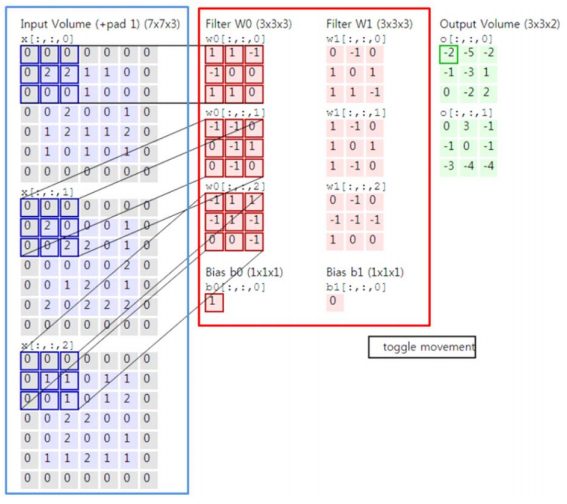

In [22]:
data = np.array([[[2, 2, 1, 1, 0],
 [0, 0, 1, 0, 0],
 [0, 2, 0, 0, 1],
 [1, 2, 1, 1, 1],
 [1, 0, 1, 0, 1]],
 [[2, 0, 0, 0, 1],
 [0, 2, 2, 0, 1],
 [0, 0, 0, 0, 2],
 [0, 1, 2, 0, 1],
 [2, 0, 2, 2, 2]],
 [[4, 2, 1, 2, 2],
 [0, 1, 0, 4, 2],
 [3, 0, 6, 2, 2],
 [4, 2, 4, 5, 2],
 [3, 4, 1, 0, 0]]
 ])
Filter=np.array([[[1,1,-1,-1,0,0,1,1,0], \
 [-1,-1,0,0,-1,1,0,-1,0], \
 [-1,1,1,-1,1,-1,0,0,-1]]]).reshape(3,3,3)

Image.open("C:\\Users\\QIA\\Desktop\\캡처.png")

#### 패딩과 Feature map의 shape과의 관계

    이미지의 특징(feature map) 을 추출하는 과정
    filter(가중치) 를 이용해서 추출한다
    원본이미지 1장 * 필터 50개 = feature map의 개수 (50개)
    　　7 x 7 　　　　3 x 3　　　 　　　7 x 7
    패딩을 2로 해주면 입력값과 동일한 shape의 feature map이 출력된다
    
### Convolution 층을 통과한 출력 이미지의 사이즈 계산방법
문제 207) 아래와 같이 입력 행렬과 필터 행렬과 스트라이드와 패딩을 입력받아 출력 행렬의 shape을 출력하는 함수를 생성하시오

In [ ]:
a = np.array([[[2, 2, 1, 1, 0], [0, 0, 1, 0, 0], [0, 2, 0, 0, 1], [1, 2, 1, 1, 2], [1, 0, 1, 0, 1]],
 [[2, 0, 0, 0, 1], [0, 2, 2, 0, 1], [0, 0, 0, 0, 2], [0, 1, 2, 0, 1], [2, 0, 2, 2, 2]],
 [[1, 1, 0, 1, 1], [0, 1, 0, 1, 2], [0, 2, 2, 0, 0], [0, 2, 0, 0, 1], [1, 1, 2, 1, 1]]])
Filter = np.array([[[1, 1, -1, -1, 0, 0, 1, 1, 0], [-1, -1, 0, 0, -1, 1, 0, -1, 0], [-1, 1, 1, -1, 1, -1, 0, 0, -1]]]).reshape(3, 3, 3)
def output(data, Filter, S, P):
    H = len(data)
    W = len(data[0])
    FH = len(Filter)
    FW = len(Filter[0])

    return (H + 2*P - FH / S) + 1
output(a, Filter, 1, 2)

### 블록으로 생각하기

    " 3차원 합성곱연산은 데이터와 필터를 직육면체 블록이라고 생각하면 쉽다"
    블록은 3차원 직육면체 (채널, 높이, 너비)로 구성됨
    필터의 채널(C), 필터의 높이(FH), 필터의 너비(FW)

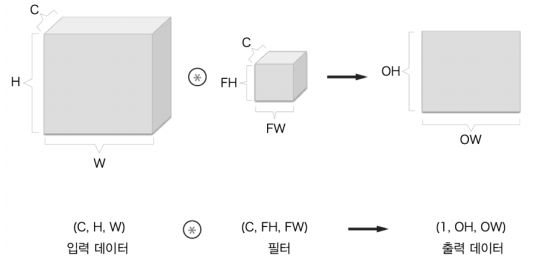

In [23]:
Image.open("C:\\Users\\QIA\\Desktop\\캡처.png")

    설명)
    아이린 사진 한장 (RGB) 를 RGB 필터로 합성곱해서 2차원 출력행렬 (feature map) 1장 출력
    
    위의 그림은 feature map이 한 개가 나오고 있는데 실제로는 아이린 사진 1장에 대해서 여러 개의 feature map이 필요하다
    
    즉, Filter의 개수를 늘려야 한다

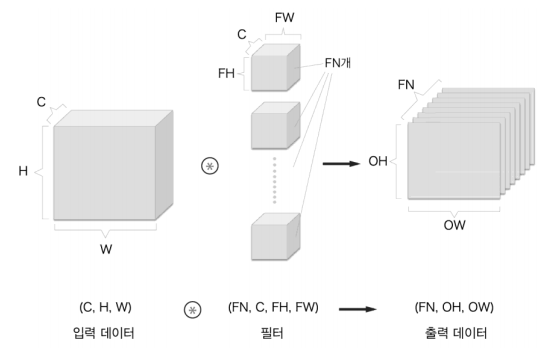

In [24]:
Image.open("C:\\Users\\QIA\\Desktop\\캡처.png")

### 배치 처림
합성곱 연산에서도 편향이 쓰이므로 편향을 더하면 어떤 그림일까?


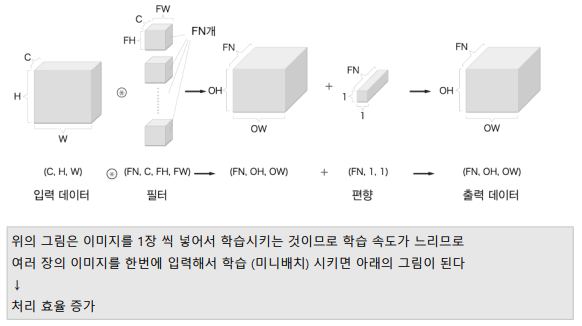

In [25]:
Image.open("C:\\Users\\QIA\\Desktop\\캡처.png")

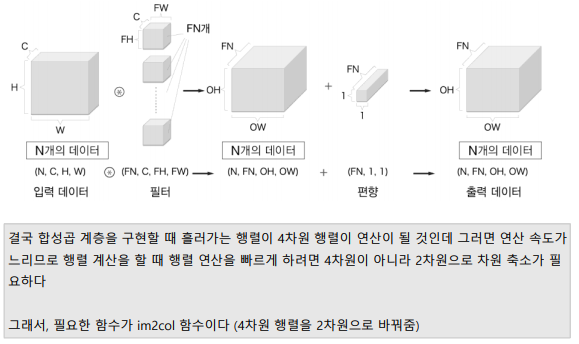

In [26]:
Image.open("C:\\Users\\QIA\\Desktop\\캡처.png")

<hr>
## 풀링 계층

    : 풀링은 세로, 가로 방향의 공간을 줄이는 연산


##### 풀링 계층의 특징
1. 학습해야 할 매개변수가 없다
2. 채널 수가 변하지 않는다
3. 입력의 변화에 영향을 적게 받는다

##### 풀링의 종류
1. 최대풀링 : 컨볼루션 데이터에서 가장 큰 값을 대표값으로 선정
2. 평균풀링 : 컨볼루션 데이터에서 모든 값의 평균 값을 대표값으로 선정
3. 확률적 풀링 : 컨볼루션 데이터에서 임의 확률로 한 개를 선정

<hr>
## 합성곱/풀링 계층 구현하기

### 4차원 배열
문제 209) 칠판에 나온 아이린 사진이라 생각하고 한장의 4차원 행렬을 만드시오
(RGB의 7 x 7 행렬 1장)


In [27]:
import numpy as np
x1= np.random.rand(1,3,7,7)
print(x1.shape)

(1, 3, 7, 7)
